In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold

In [54]:
np.random.seed(0)

#### Variables ####

In [55]:
dogs_whisker_length =np.random.normal(loc=5,scale=1,size=10)
cats_whisker_length =np.random.normal(loc=8,scale=1,size=10)
dogs_ear_flappiness = np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness = np.random.normal(loc=5,scale=1,size=10)

In [56]:
cats_whisker_length

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

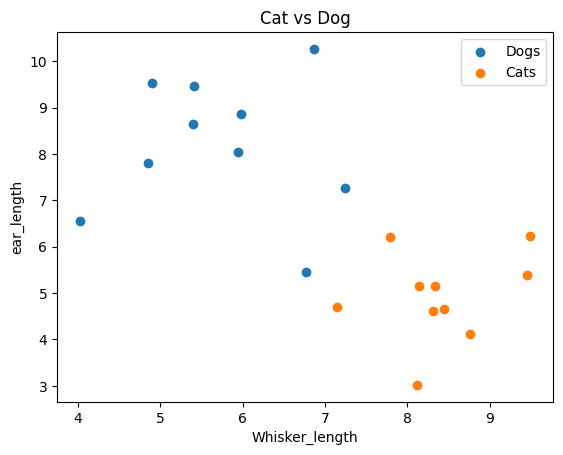

In [58]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness,label ='Dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness,label='Cats')
plt.xlabel('Whisker_length')
plt.ylabel('ear_length')
plt.title('Cat vs Dog')
plt.legend()
plt.show()

#### Implementation of Linear classifier Algorithm ####

In [44]:
''' 
Params
k: number of choices we are about to Make on the Linear Classifier
d: Number of Featureswhich can get compared
data_dog: dogs data
data_cat: cats data 
'''

def linear_classifier(data_dog,data_cat,K,d):
    best_error =float('inf')
    best_theta = None
    best_theta0 =None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dog,data_cat,theta,theta0)

        if error < best_error:
            best_error = error
            best_theta =theta
            best_theta0 =theta0
            
    return best_theta,best_theta0,best_error



#### Compute Error ####

In [43]:
def compute_error(data_dog,data_cat,theta,theta0):
    error =0
    for x_dog in data_dog:
        if np.dot(theta,x_dog)+theta0 <= 0:
            error += 1
    for x_cat in data_cat:
        if np.dot(theta,x_cat)+theta0 > 0:
            error += 1
    return error


In [59]:
# prepare data for the algorithm

dog_data = np.vstack((dogs_whisker_length,dogs_ear_flappiness)).T
cat_data = np.vstack((cats_whisker_length,cats_ear_flappiness)).T
combined_data = np.vstack((dog_data,cat_data))
combined_data

labels =np.hstack((np.zeros(len(dog_data)),np.ones(len(cat_data))))
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [60]:
x_train,x_test,y_train,y_test=train_test_split(combined_data,labels, test_size=0.2, random_state=42)

In [61]:
x_train[y_train == 0][:,0]

array([4.89678115, 4.02272212, 7.2408932 , 5.97873798, 5.4105985 ,
       6.86755799, 4.84864279, 5.95008842])

#### Plotting decision boundary ####

AttributeError: Line2D.set() got an unexpected keyword argument 'cmap'

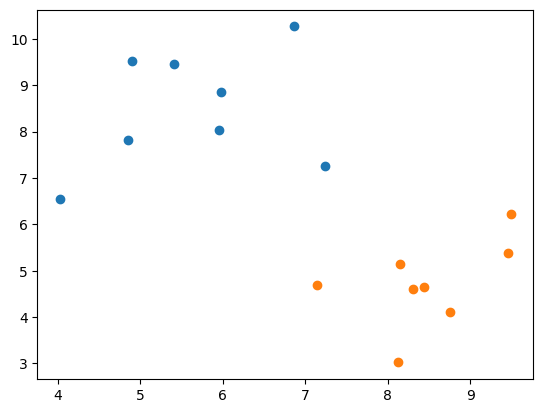

In [47]:
plt.scatter(x_train[y_train == 0][:,0],x_train[y_train == 0][:,1],label ='Dogs_Train')
plt.scatter(x_train[y_train == 1][:,0],x_train[y_train == 1][:,1],label ='Cats_Train')
plt.plot(x_test[:, 0],x_test[:, 1],c=y_test,cmap='bwr',label='Decision_Boundary')
plt.xlabel('Whisker_length')
plt.ylabel('ear_length')
plt.title('Cat vs Dog Training_test data split')
plt.legend()
plt.show()  

In [62]:
k =100
d=2

best_theta_train, best_theta0_train,train_error = linear_classifier(x_train[y_train==0],x_train[y_train==1],k,d)

In [64]:
print(best_theta_train)

[-1.04525337  1.21114529]


#### Kfold Cross validation


In [65]:
def cross_validation(dog_data,cat_data,k_values,d,n_splits):
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=42)
    avg_errors=[]
    for k in k_values:
        errors=[]
        for train_index,test_index in kf.split(dog_data):
            x_train_fold =np.vstack((dog_data[train_index],cat_data[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)),np.ones(len(train_index))))
            x_val_fold =np.vstack((dog_data[test_index],cat_data[test_index]))
            y_val_fold = np.hstack((np.zeros(len(test_index)),np.ones(len(test_index))))

            best_theta_fold, best_theta0_fold,fold_error = linear_classifier(x_train_fold[y_train_fold==0],x_train_fold[y_train_fold==1],k,d)

            errors.append(compute_error(x_train_fold[y_train_fold==0],x_train_fold[y_train_fold==1],best_theta_fold,best_theta0_fold))
        
        avg_errors.append(np.mean(errors))

    best_k_value=k_values[np.argmin(avg_errors)]

    return best_k_value





In [78]:
k_values =[1,10,50,100,200,350]

best_k =cross_validation(dog_data,cat_data,k_values,d=2,n_splits=5)

print(f"Besttest value of K:{best_k}")

Besttest value of K:100


In [79]:
k= best_k
d=2
best_theta_train, best_theta0_train,train_error = linear_classifier(x_train[y_train==0],x_train[y_train==1],k,d)

In [80]:
best_theta_train

array([-0.69866403,  1.15234917])

In [81]:
x_vals= np.linspace(2,10,100)
y_vals =(-best_theta_train[0]/best_theta_train[1])* x_vals - (best_theta0_train /best_theta_train[1])
y_vals

array([2.37149813, 2.4204917 , 2.46948527, 2.51847884, 2.56747241,
       2.61646598, 2.66545955, 2.71445312, 2.76344669, 2.81244026,
       2.86143383, 2.9104274 , 2.95942097, 3.00841454, 3.05740811,
       3.10640168, 3.15539525, 3.20438882, 3.25338239, 3.30237596,
       3.35136953, 3.4003631 , 3.44935667, 3.49835024, 3.54734381,
       3.59633738, 3.64533095, 3.69432452, 3.74331809, 3.79231166,
       3.84130523, 3.89029879, 3.93929236, 3.98828593, 4.0372795 ,
       4.08627307, 4.13526664, 4.18426021, 4.23325378, 4.28224735,
       4.33124092, 4.38023449, 4.42922806, 4.47822163, 4.5272152 ,
       4.57620877, 4.62520234, 4.67419591, 4.72318948, 4.77218305,
       4.82117662, 4.87017019, 4.91916376, 4.96815733, 5.0171509 ,
       5.06614447, 5.11513804, 5.16413161, 5.21312518, 5.26211875,
       5.31111232, 5.36010589, 5.40909946, 5.45809303, 5.5070866 ,
       5.55608017, 5.60507374, 5.65406731, 5.70306088, 5.75205445,
       5.80104802, 5.85004159, 5.89903516, 5.94802873, 5.99702

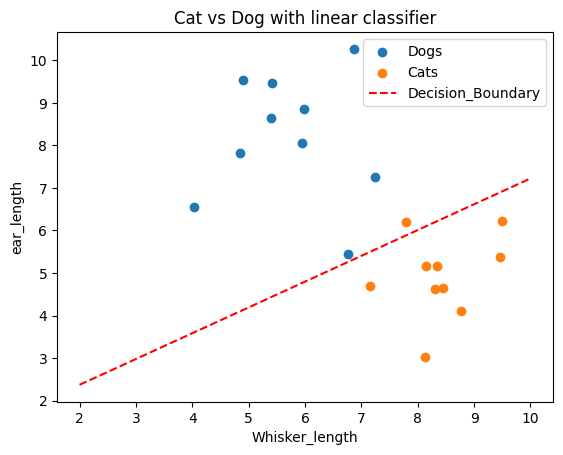

In [82]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness,label ='Dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness,label='Cats')
plt.plot(x_vals,y_vals,color ='red',linestyle='--',label='Decision_Boundary')
plt.xlabel('Whisker_length')
plt.ylabel('ear_length')
plt.title('Cat vs Dog with linear classifier')
plt.legend()
plt.show()